# Problem Statement

Walmart Inc. aims to analyze customer spending behavior on Black Friday to determine if there are notable differences in spending amounts between male and female customers. With an equal customer base of 50 million males and 50 million females, this analysis seeks to understand whether women tend to spend more than men on this key shopping day.


1. Is there a statistically significant difference in average spending between male and female customers on Black Friday?".  Insights from this analysis will guide Walmart's strategic decisions in areas such as promotions, inventory, and customer targeting.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
data=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094")

In [ ]:
data.shape

(550068, 10)

In [ ]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
data.describe(include="object")

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [ ]:
data.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.nunique()

,0
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category,20
Purchase,18105


In [ ]:
data["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
data["Gender"].unique()

array(['F', 'M'], dtype=object)

In [ ]:
data["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [ ]:
data["Marital_Status"].unique()

array([0, 1])

In [ ]:
data["Product_Category"].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [ ]:
data.shape

(550068, 10)

##Insights

### 1. Structure of the Dataset
- The dataset consists of the following columns:`'User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category', 'Purchase'`
-  Features like `Purchase`, `Stay_In_Current_City_Years` are continuous, while `User_ID, Product_ID, Gender, Age, Occupation, City_Category, Marital_Status, and ProductCategory ` are categorical.

### 2. Basic Summary
- **Total Rows**: 550068
- **Total Columns**: 10

### 3.DataType Summary
-  `Gender, Age, City_Category, Marital_Status, and Product_Category` were converted to the category data type.

`User_ID` was converted to the object data type.

### 4. Missing Values
- No missing values were found

### 5. Duplicate Values
- No Duplicate values were found

### 6. Unique Values Summary
- Features such as  `City_Category`, `Gender`, `MaritalStatus` have unique values 3,2,2.


#Data Cleaning and Preprocessing

In [ ]:
dataProcess=data.copy()

In [ ]:
dataProcess.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
dataProcess["User_ID"]=dataProcess["User_ID"].astype("object")
dataProcess["Gender"] = dataProcess["Gender"].astype("category")
dataProcess["Age"] = dataProcess["Age"].astype("category")
dataProcess["City_Category"] = dataProcess["City_Category"].astype("category")
dataProcess["Marital_Status"] = dataProcess["Marital_Status"].astype("category")
dataProcess["Product_Category"] = dataProcess["Product_Category"].astype("category")
dataProcess["Stay_In_Current_City_Years"] = dataProcess["Stay_In_Current_City_Years"].astype("category")
dataProcess["Occupation"] = dataProcess["Occupation"].astype("category")

##Insights
### 1. Handling Missing Values
- The dataset was checked for missing values, and the following observations were made:
  - No missing values were detected in any columns, so no imputation was required.

### 2. Data Transformation
- **Categorical Variables**:
  - Categorical variables such as `Gender, Marital_Status, Product_Category, Age, City_Category, Stay_In_Current_City_Years, and Occupation` were converted to categorical data types to ensure efficient memory usage and better performance during analysis.


  
### 3. Final Dataframe Structure
- After preprocessing, the final cleaned dataset has the following structure:
  - Categorical features: `Product_Category, Gender, Marital_Status, Age, Stay_In_Current_City_Years, Occupation, City_Category,`
  - Numerical features:  `Purchase`


#Non-Graphical Analysis: Value counts and unique attributes ​

In [ ]:
pdata=dataProcess.copy()

In [ ]:
pdata["Gender"].value_counts()

,count
Gender,
M,414259
F,135809


Gender Distribution:

The dataset includes both male (M) and female (F) customers, with males being the larger group.

In [ ]:
pdata.groupby(["Gender"],observed=False)["Purchase"].sum()

,Purchase
Gender,
F,1186232642
M,3909580100


In [ ]:
pdata.groupby(["Gender"],observed=False)["Purchase"].mean()

,Purchase
Gender,
F,8734.565765
M,9437.526040


Both men and women spend money on purchases, with men spending a bit more on average.

In [ ]:
pdata[["Age","Gender"]].value_counts().unstack()

Gender,F,M
Age,,
0-17,5083,10019
18-25,24628,75032
26-35,50752,168835
36-45,27170,82843
46-50,13199,32502
51-55,9894,28607
55+,5083,16421


 people aged 26-35 tend to spend more than some other age groups.


In [ ]:
pdata.groupby(["Age","Gender"],observed=False)["Purchase"].sum().unstack()

Gender,F,M
Age,,
0-17,42385978,92527205
18-25,205475842,708372833
26-35,442976233,1588794345
36-45,243438963,783130921
46-50,116706864,304136539
51-55,89465997,277633647
55+,45782765,154984610


Most customers are from City B.
In each city, there are more male customers than female customers.

In [ ]:
pdata.groupby(["City_Category","Gender"],observed=False)["Purchase"].sum()

City_Category  Gender
A              F          306329915
               M         1010141746
B              F          493617008
               M         1621916597
C              F          386285719
               M         1277521757
Name: Purchase, dtype: int64

 Customers from City B generally show higher spending.

In [ ]:
pdata["Purchase"].median()

8047.0

In [ ]:
pdata.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


The mean purchase amount is approximately 9264, and the median is 8047. The mean is higher than the median, indicating a right-skewed distribution

In [ ]:
pdata.describe(include=["object","category"])

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


1. There are 5891 unique users out of 550,068 records

2. The most frequently purchased product (P00265242) appears 1880 times

3. male customers are making more purchases than female customer

4. 26-35 age group being the most frequent group

5. The dataset contains 21 unique occupations, with occupation category 4 being the most common (72,308 entries).

6. There are 3 city categories (A, B, C), with B being the most represented

7. There are 5 unique categories for years spent in the current city, with 1 year being the most frequent

In [ ]:
pd.pivot_table(pdata,columns=["Age","Gender"],index="City_Category",values="Purchase",aggfunc="count",observed=False,margins=True)

Age            0-17         18-25         26-35          36-45         46-50  \
Gender            F      M      F      M      F       M      F      M      F   
City_Category                                                                  
A              1447   1097   6269  21266  17491   56254   7105  19512   1250   
B              1565   3870  11686  31561  21437   70147  11110  36488   6404   
C              2071   5052   6673  22205  11824   42434   8955  26843   5545   
All            5083  10019  24628  75032  50752  168835  27170  82843  13199   

Age                  51-55          55+            All  
Gender             M     F      M     F      M          
City_Category                                           
A               6357  1778   4321   364   3209  147720  
B              14002  4243  13498  1351   3811  231173  
C              12143  3873  10788  3368   9401  171175  
All            32502  9894  28607  5083  16421  550068

In [ ]:
pd.pivot_table(pdata,columns=["Age","Gender"],index=["City_Category"],values="Purchase",aggfunc="sum",observed=False,margins=True)

Age                0-17                18-25                 26-35  \
Gender                F         M          F          M          F   
City_Category                                                        
A              11324587  10592254   51104517  192132351  152198055   
B              13844363  34621137   93774009  296820223  183691038   
C              17217028  47313814   60597316  219420259  107087140   
All            42385978  92527205  205475842  708372833  442976233   

Age                            36-45                 46-50             \
Gender                  M          F          M          F          M   
City_Category                                                           
A               508004279   61933245  177362475   10919482   52587761   
B               654228670   97271104  336246771   55201613  133511588   
C               426561396   84234614  269521675   50585769  118037190   
All            1588794345  243438963  783130921  116706864  304136539   

Age               51-55                  55+                    All  
Gender                F          M         F          M              
City_Category                                                        
A              15486422   42505950   3363607   26956676  1316471661  
B              37662356  128054753  12172525   38433455  2115533605  
C              36317219  107072944  30246633   89594479  1663807476  
All            89465997  277633647  45782765  154984610  5095812742

In [ ]:
pd.crosstab(pdata["City_Category"],pdata["Gender"],margins=True)

Gender,F,M,All
City_Category,,,
A,35704,112016,147720
B,57796,173377,231173
C,42309,128866,171175
All,135809,414259,550068


City A: 35,704 females and 112,016 males, totaling 147,720 people.

City B: 57,796 females and 173,377 males, totaling 231,173 people.

City C: 42,309 females and 128,866 males, totaling 171,175 people.

Altogether, there are 135,809 females and 414,259 males, with a total of 550,068 people in the data.

User_ID	Product_ID	Gender	Age	Occupation	City_Category	Stay_In_Current_City_Years	Marital_Status	Product_Category	Purchase

In [ ]:
pd.pivot_table(data=pdata,columns=["Age",'Gender'],index=["Product_Category"],values="User_ID",aggfunc="count",observed=False,margins=True)

Age               0-17         18-25         26-35          36-45         \
Gender               F      M      F      M      F       M      F      M   
Product_Category                                                           
1                  765   2820   4640  22322   9384   48865   5273  22375   
2                  366    439   1154   3274   1847    7081   1193   3719   
3                  506    694   1514   3196   1910    5752   1178   2676   
4                  390    368    778   1685   1157    3035    706   1648   
5                 1511   2819   7928  20594  16586   44887   7817  21560   
6                   89    310    770   2979   1753    6732    972   2927   
7                    8     45    102    379    396    1255    216    593   
8                  860   1398   5205  12706  12709   31547   6588  16708   
9                    5     11     12     51     23     131     17     90   
10                  29     82    119    484    364    1423    282    953   
11                 240    500   1047   3550   1670    8204   1013   3940   
12                  85     40    217    222    411     685    353    641   
13                  35     77    203    553    497    1599    350    900   
14                  24     15     92    138    235     329    129    183   
15                  42    118    171    853    362    2010    229   1166   
16                  61    168    420   1178    954    3164    504   1451   
17                   2      4      8     33      5     122     23    112   
18                   8     19     46    293    105     937     85    617   
19                  25     34     73    202    149     414     95    225   
20                  32     58    129    340    235     663    147    359   
All               5083  10019  24628  75032  50752  168835  27170  82843   

Age               46-50        51-55          55+            All  
Gender                F      M     F      M     F      M          
Product_Category                                                  
1                  2492   7982  1589   7460   688   3723  140378  
2                   521   1584   393   1388   184    721   23864  
3                   449    927   301    623   148    339   20213  
4                   313    677   207    471    88    230   11753  
5                  3756   8215  2989   6904  1374   3993  150933  
6                   442   1180   355   1095   178    684   20466  
7                   103    224    84    182    34    100    3721  
8                  3550   7106  2868   6472  1778   4430  113925  
9                     6     27     5     24     2      6     410  
10                  136    384   132    387   100    250    5125  
11                  444   1660   233   1225    92    469   24287  
12                  201    319   152    281   113    227    3947  
13                  158    393   146    337    73    228    5549  
14                   56     93    63     91    24     51    1523  
15                  122    480    82    426    38    191    6290  
16                  249    630   159    513    55    322    9828  
17                    8     87     7    100     9     58     578  
18                   69    282    34    389    35    206    3125  
19                   50     99    33    101    26     77    1603  
20                   74    153    62    138    44    116    2550  
All               13199  32502  9894  28607  5083  16421  550068

## Insights

### 1. Gender-wise Purchase Patterns
- **Purchase Count**: Males made significantly more purchases (414,259) than females (135,809).
- **Total Spending**:
  - Males spent a total of **\$3,909,580,100**, while females spent **\$1,186,232,642**, indicating that males spent 3 times more than females.
- **Average Purchase Amount**:
  - The average purchase by females is **\$8,734.57**, while males spend slightly more on average, at **\$9,437.53**. This suggests that males tend to make larger purchases on average.

### 2. Age-wise Purchase Patterns
- Across all age groups, males have higher purchase counts than females.
- **Highest Purchasing Age Group**: The age group **26-35** has the highest number of purchases for both genders (females: 50,752; males: 168,835), which makes this group a prime target for marketing.
- **Spending by Age**:
  - The **26-35 age group** contributes the most to total spending, with males spending **1,588,794,345** dollars  and females **442,976,233** dollars`.
  - Younger age groups (0-17) show the lowest spending, likely reflecting limited purchasing power or lower involvement in shopping.
- **Older Age Groups**: Spending decreases for both genders above age 45, indicating less shopping activity in these segments.

### 3. City-wise Purchase Insights
- **City Category B**:
  - Highest number of purchases (231,173) and the highest spending, with males spending **\$1,621,916,597** and females **\$493,617,008**.
- **City Category A**:
  - Males spent **$1,010,141,746** and females **\$306,329,915**, making it the second most active city.
- **City Category C**:
  - The lowest total spending, but significant shopping activity is still seen, especially among males and females in specific age groups.


### 4. Customer Distribution by City and Age
- **City B**:
  - Shows a higher count of individuals in the **26-35** age group, particularly males, with significant counts in the **18-25** and **36-45** age groups. This may indicate a younger, active shopper base.
- **City Category A**:
  - Though smaller in total counts, it has higher average spending, especially among males in the **26-35** and **36-45** age groups.

### 5. Implications for Walmart’s Marketing Strategy
- Since **males in the 26-35 age group** spend the most, Walmart could consider targeted promotions and tailored product offerings for this demographic.
- **City Category B** has the highest spending overall, suggesting Walmart should allocate more promotional efforts or inventory to this location.
- Since females spend slightly less on average, Walmart could design tailored promotions or bundles to encourage higher spending among female shoppers.


#Visual Analysis

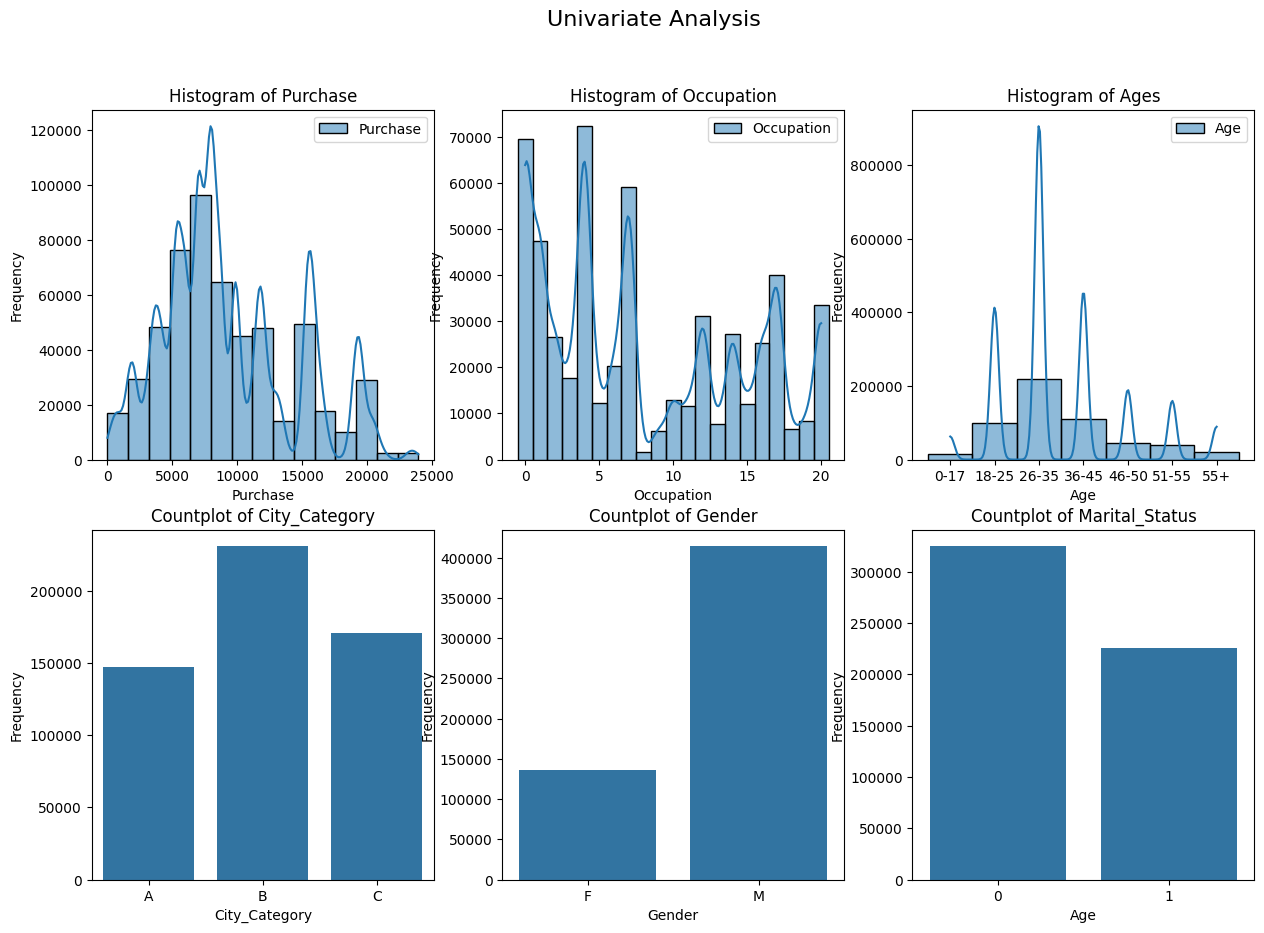

In [ ]:
fig,ax=plt.subplots(2,3,figsize=(15,10))
sns.histplot(x=pdata["Purchase"],bins=15,label="Purchase",kde=True,ax=ax[0,0])
ax[0,0].set_ylabel("Frequency")
ax[0,0].set_xlabel("Purchase")
ax[0,0].set_title("Histogram of Purchase")
ax[0,0].legend()

sns.histplot(x=pdata["Occupation"],bins=15,label="Occupation",kde=True,ax=ax[0,1])
ax[0,1].set_ylabel("Frequency")
ax[0,1].set_xlabel("Occupation")
ax[0,1].set_title("Histogram of Occupation")
ax[0,1].legend()

sns.histplot(x=pdata["Age"],label="Age",kde=True,ax=ax[0,2])
ax[0,2].set_ylabel("Frequency")
ax[0,2].set_xlabel("Age")
ax[0,2].set_title("Histogram of Ages")
ax[0,2].legend()


sns.countplot(x=pdata["City_Category"],ax=ax[1,0])
ax[1,0].set_ylabel("Frequency")
ax[1,0].set_xlabel("City_Category")
ax[1,0].set_title("Countplot of City_Category")


sns.countplot(x=pdata["Gender"],ax=ax[1,1])
ax[1,1].set_ylabel("Frequency")
ax[1,1].set_xlabel("Gender")
ax[1,1].set_title("Countplot of Gender")

sns.countplot(x=pdata["Marital_Status"],ax=ax[1,2])
ax[1,2].set_ylabel("Frequency")
ax[1,2].set_xlabel("Age")
ax[1,2].set_title("Countplot of Marital_Status")
plt.suptitle("Univariate Analysis",fontsize=16)
plt.show()


## Univariate Analysis Insights

### 1. Purchase Distribution
- Most purchases cluster between **\$5,000** and **\$10,000**, showing a right-skewed distribution.
- High-value purchases are less common, indicating that customers typically make moderate purchases.

### 2. Occupation Distribution
- Certain occupation codes ( 0, 4, 10) have higher frequencies, suggesting these groups shop more frequently.
- This highlights potential target groups for occupation-based marketing strategies.

### 3. Age Distribution
- The **26-35 age group** is the largest, followed by **18-25** and **36-45**.
- Young to middle-aged customers dominate the shopper base, guiding age-focused promotions.

### 4. City Category Distribution
- **City Category B** has the highest customer count, followed by C and then A.
- Indicates that mid-sized cities have more shoppers, which can influence store placement and marketing.

### 5. Gender Distribution
- Male customers outnumber female customers significantly.
- Enhancing engagement with female shoppers could present growth opportunities.

### 6. Marital Status Distribution
- Unmarried customers are more prevalent than married ones.
- Marketing campaigns tailored to single individuals might resonate with a larger audience.


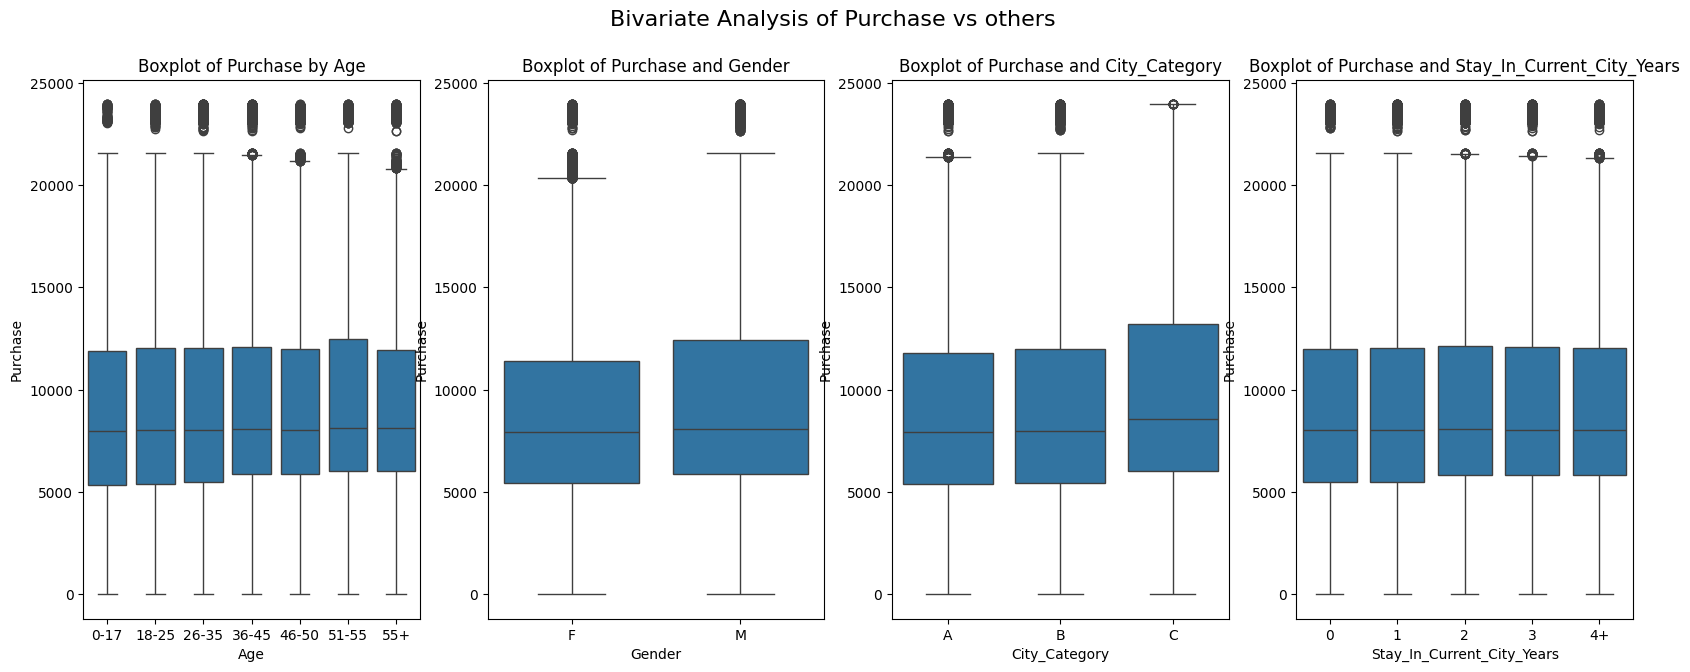

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20, 7))

# First boxplot
sns.boxplot(x=pdata["Age"], y=pdata["Purchase"], ax=ax[0])
ax[0].set_ylabel("Purchase")
ax[0].set_xlabel("Age")
ax[0].set_title("Boxplot of Purchase by Age")

# Second boxplot
sns.boxplot(x=pdata["Gender"], y=pdata["Purchase"], ax=ax[1])
ax[1].set_ylabel("Purchase")
ax[1].set_xlabel("Gender")
ax[1].set_title("Boxplot of Purchase and Gender")

# Third boxplot
sns.boxplot(x=pdata["City_Category"], y=pdata["Purchase"], ax=ax[2])
ax[2].set_ylabel("Purchase")
ax[2].set_xlabel("City_Category")
ax[2].set_title("Boxplot of Purchase and City_Category")

# Fourth boxplot
sns.boxplot(x=pdata["Stay_In_Current_City_Years"], y=pdata["Purchase"], ax=ax[3])
ax[3].set_ylabel("Purchase")
ax[3].set_xlabel("Stay_In_Current_City_Years")
ax[3].set_title("Boxplot of Purchase and Stay_In_Current_City_Years")

plt.suptitle("Bivariate Analysis of Purchase vs others",fontsize=16)
plt.show()



# Bivariate Analysis of Purchase vs Other Features

### 1. Boxplot of Purchase by Age
- The median purchase amount is similar across all age groups, with a slight increase for the 46-50 group.
- Younger and older groups show more outliers, indicating occasional high-value purchases.

### 2. Boxplot of Purchase and Gender
- Males generally have a higher median purchase amount than females.
- Both genders show a similar range, but males display slightly more variability.

### 3. Boxplot of Purchase and City_Category
- Customers in City Category C have a slightly higher median purchase than those in A and B.
- Outliers are present across all city categories, with Category A showing fewer high outliers.

### 4. Boxplot of Purchase and Stay_In_Current_City_Years
- The median purchase amount remains consistent regardless of years spent in the current city.
- A similar range and number of outliers are seen across all categories, indicating no strong effect of city tenure on purchase behavior.


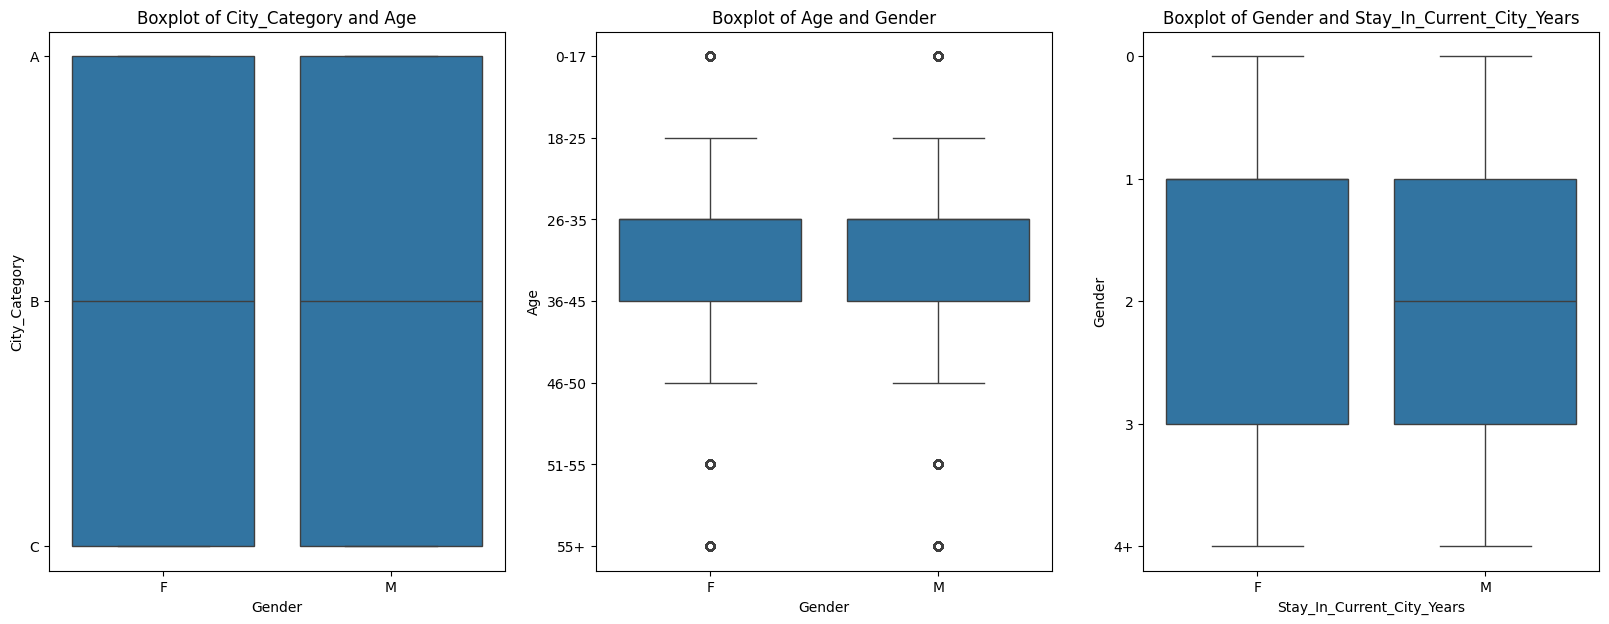

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 7))

# First boxplot
sns.boxplot(x=pdata["Gender"], y=pdata["City_Category"], ax=ax[0])
ax[0].set_ylabel("City_Category")
ax[0].set_xlabel("Gender")
ax[0].set_title("Boxplot of City_Category and Age")

# Second boxplot
sns.boxplot(x=pdata["Gender"], y=pdata["Age"], ax=ax[1])
ax[1].set_ylabel("Age")
ax[1].set_xlabel("Gender")
ax[1].set_title("Boxplot of Age and Gender")

# Third boxplot
sns.boxplot(x=pdata["Gender"], y=pdata["Stay_In_Current_City_Years"], ax=ax[2])
ax[2].set_ylabel("Gender")
ax[2].set_xlabel("Stay_In_Current_City_Years")
ax[2].set_title("Boxplot of Gender and Stay_In_Current_City_Years")


plt.show()


# Bivariate Analysis of Various Attributes

### 1. Boxplot of City_Category and Age by Gender
- The distribution of customers across city categories (A, B, C) is similar for both genders.
- There is no notable difference between male and female distributions across city categories, indicating even representation.

### 2. Boxplot of Age and Gender
- The age distribution shows that both males and females are most commonly in the 26-35 age range.
- Females have more age-related outliers (notably in the 55+ group), indicating some presence of older female customers.

### 3. Boxplot of Gender and Stay_In_Current_City_Years
- Males and females have a similar distribution across years spent in the current city.
- There is no significant difference in median or range between genders in terms of city tenure.


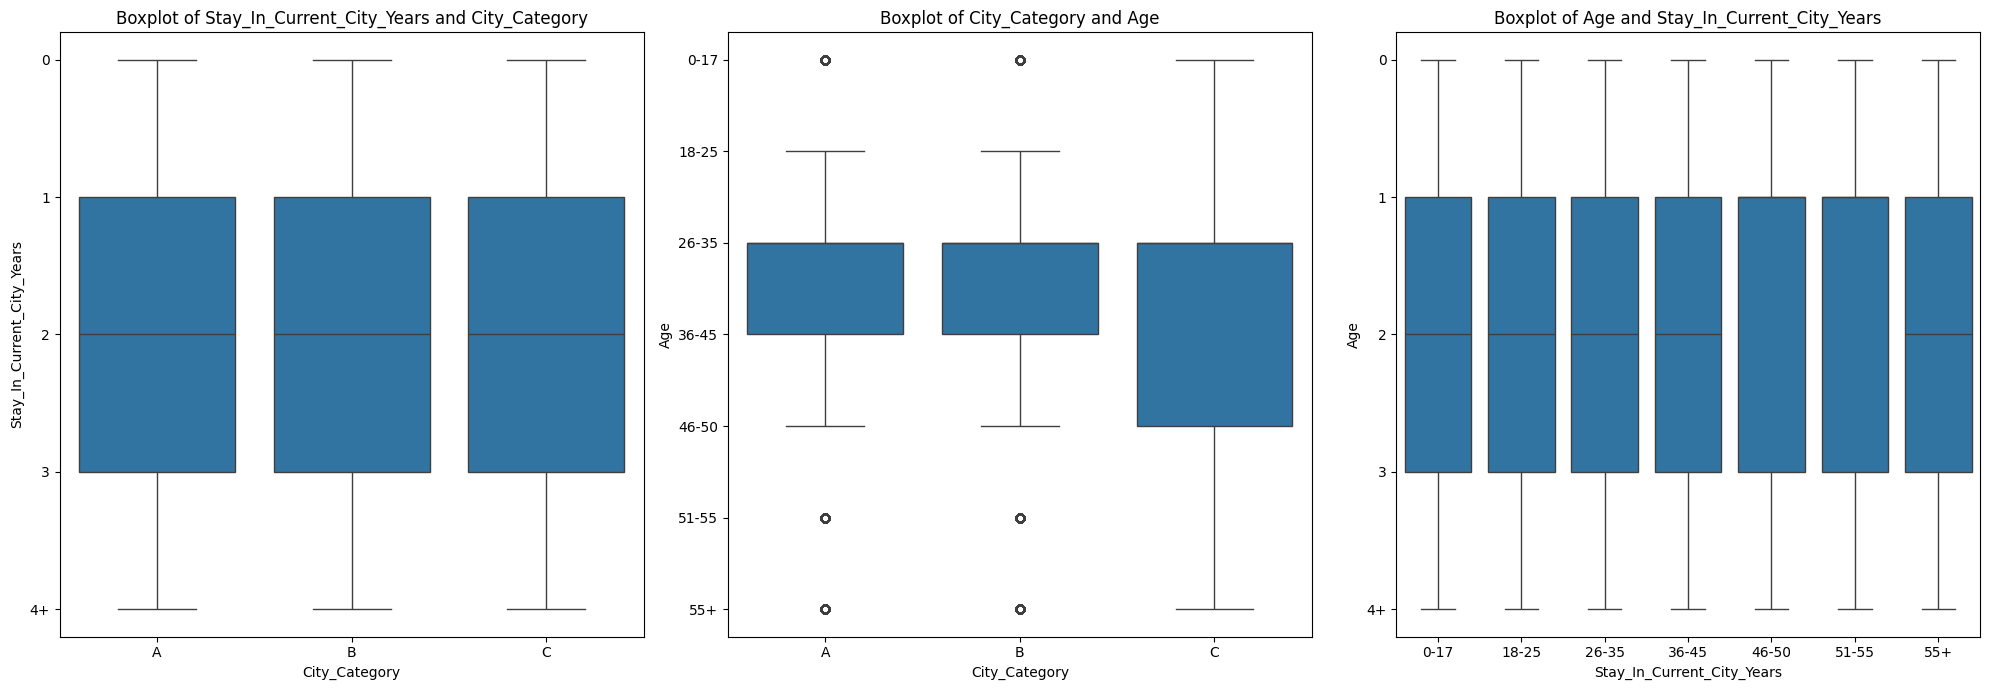

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 7))

# First boxplot
sns.boxplot(x=pdata["City_Category"], y=pdata["Stay_In_Current_City_Years"], ax=ax[0])
ax[0].set_ylabel("Stay_In_Current_City_Years")
ax[0].set_xlabel("City_Category")
ax[0].set_title("Boxplot of Stay_In_Current_City_Years and City_Category")

# Second boxplot
sns.boxplot(x=pdata["City_Category"], y=pdata["Age"], ax=ax[1])
ax[1].set_ylabel("Age")
ax[1].set_xlabel("City_Category")
ax[1].set_title("Boxplot of City_Category and Age")

# Third boxplot
sns.boxplot(x=pdata["Age"], y=pdata["Stay_In_Current_City_Years"], ax=ax[2])
ax[2].set_ylabel("Age")
ax[2].set_xlabel("Stay_In_Current_City_Years")
ax[2].set_title("Boxplot of Age and Stay_In_Current_City_Years")


plt.tight_layout()  # Optional: ensures proper spacing
plt.show()


# Bivariate Analysis of Stay_In_Current_City_Years, City_Category, and Age

### 1. Boxplot of Stay_In_Current_City_Years and City_Category
- The median years spent in the current city are similar across all city categories (A, B, C).
- No significant difference is observed, suggesting similar residency duration across different city types.

### 2. Boxplot of City_Category and Age
- Age distributions are consistent across city categories, with the 26-35 age group having the highest concentration.
- A few outliers appear in city categories, notably in the 0-17 and 55+ age groups, indicating some younger and older customers in various cities.

### 3. Boxplot of Age and Stay_In_Current_City_Years
- The years spent in the current city are fairly consistent across age groups, with the median being stable.
- There is no clear trend showing age affects city tenure, indicating a balanced residency duration across all ages.


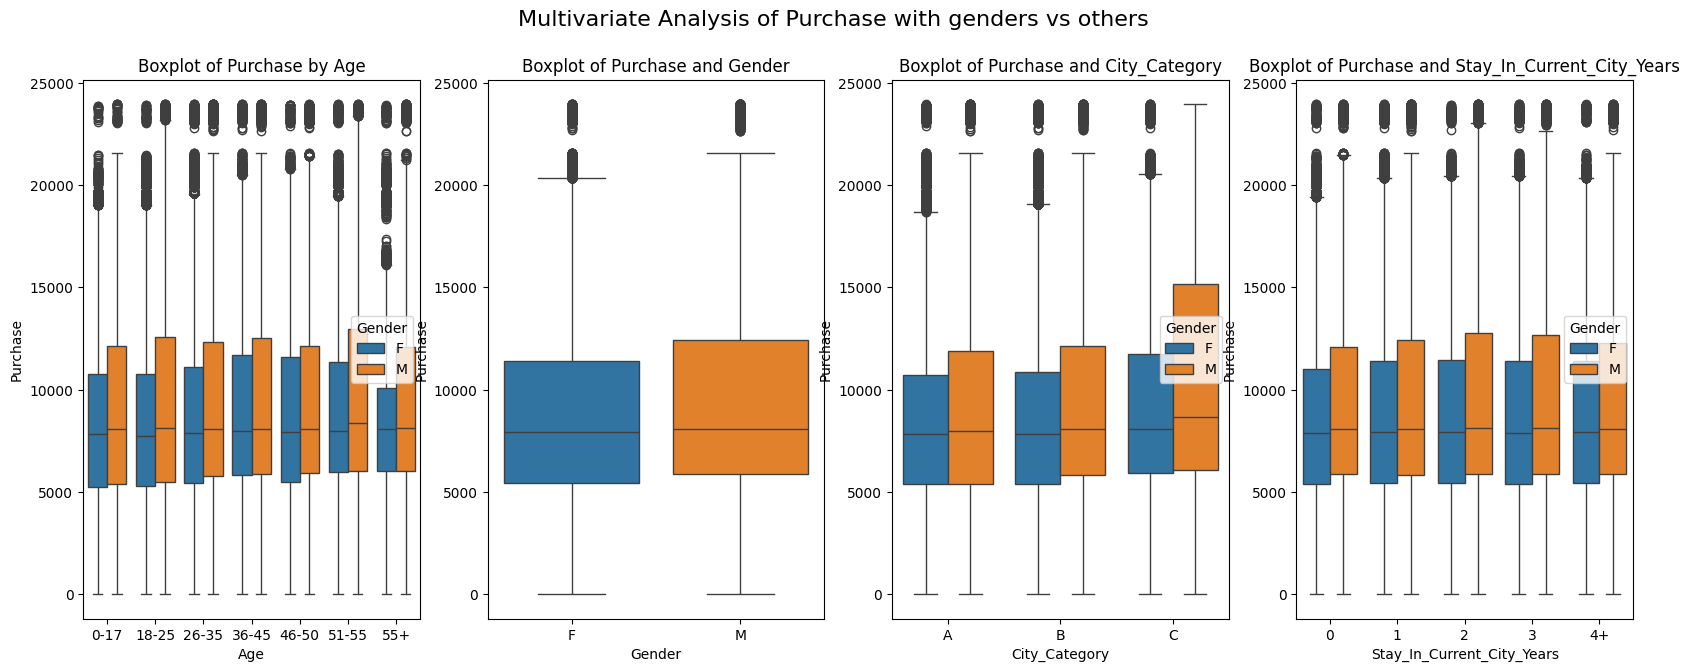

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20, 7))

# First boxplot
sns.boxplot(x=pdata["Age"], y=pdata["Purchase"],hue=pdata["Gender"] ,ax=ax[0])
ax[0].set_ylabel("Purchase")
ax[0].set_xlabel("Age")
ax[0].set_title("Boxplot of Purchase by Age")

# Second boxplot
sns.boxplot(x=pdata["Gender"], y=pdata["Purchase"],hue=pdata["Gender"] , ax=ax[1])
ax[1].set_ylabel("Purchase")
ax[1].set_xlabel("Gender")
ax[1].set_title("Boxplot of Purchase and Gender")

# Third boxplot
sns.boxplot(x=pdata["City_Category"], y=pdata["Purchase"],hue=pdata["Gender"] , ax=ax[2])
ax[2].set_ylabel("Purchase")
ax[2].set_xlabel("City_Category")
ax[2].set_title("Boxplot of Purchase and City_Category")

# Fourth boxplot
sns.boxplot(x=pdata["Stay_In_Current_City_Years"], y=pdata["Purchase"],hue=pdata["Gender"] , ax=ax[3])
ax[3].set_ylabel("Purchase")
ax[3].set_xlabel("Stay_In_Current_City_Years")
ax[3].set_title("Boxplot of Purchase and Stay_In_Current_City_Years")
plt.suptitle("Multivariate Analysis of Purchase with genders vs others",fontsize=16)
plt.show()


# Multivariate Analysis of Purchase with Gender across Various Features

### 1. Boxplot of Purchase by Age and Gender
- **Males** generally show a higher median purchase amount than **females** across all age groups.
- In the **26-35 age group**, both genders have the highest median purchase amounts, with males leading slightly.
- This suggests that age does not significantly impact the range of purchase amounts within each gender, though males tend to spend more on average across all ages.

### 2. Boxplot of Purchase and Gender
- Males have a **higher median purchase** value compared to females, confirming that males generally spend more.
- The range (spread) of purchase values for both genders is wide, but males show more high-value outliers, indicating a tendency for some to make larger purchases.


### 3. Boxplot of Purchase and City_Category by Gender
- In all city categories (A, B, and C), **males consistently have a higher median purchase** amount than females.
- The **median purchase amount** is highest in City Category C for both genders, with males leading slightly.
- Outliers are present in all city categories, but City Category B shows fewer high outliers for females, while males have consistent outliers across all categories.
- This implies that males across all city categories, especially in Category C, are inclined to make higher 1purchases, highlighting potential regional and gender-based purchasing patterns.

### 4. Boxplot of Purchase and Stay_In_Current_City_Years by Gender
- The **median purchase amount** is stable across different durations spent in the current city for both genders, with males consistently spending more on average.

- This indicates that tenure in the city is not a major factor affecting purchase amounts but does show that males have a tendency to make higher purchases overall.


# Are Women Spending More Money Per Transaction Than Men? Why or Why Not?

In [ ]:
pdata.groupby(["Gender"],observed=False)["Purchase"].mean()

,Purchase
Gender,
F,8734.565765
M,9437.526040


In [ ]:
pdata.groupby(["Gender"],observed=False)["Purchase"].median()

,Purchase
Gender,
F,7914.0
M,8098.0


S

These results suggest that, on average, males are spending more per transaction than females on Black Friday, both in terms of mean and median. The difference in mean purchase amount is approximately $700.

Men might be more likely to make high-value purchases or buy specific items that tend to be more expensive.


# Confidence Intervals and Distribution of Mean Expenses by Gender

In [ ]:
femalePurchse=pdata[pdata["Gender"]=="F"].Purchase

In [ ]:
malePurchse=pdata[pdata["Gender"]=="M"].Purchase

In [ ]:
avg_male_purhcase=np.mean(malePurchse)
avg_female_purhcase=np.mean(femalePurchse)
avg_male_purhcase,avg_female_purhcase


(9437.526040472265, 8734.565765155476)

In [ ]:
avg_male_std=np.std(malePurchse,ddof=1)

avg_female_std=np.std(femalePurchse,ddof=1)
avg_male_std,avg_female_std

(5092.186209777949, 4767.233289291444)

In [ ]:

ci = 0.90
zscore = norm.ppf(1 - ((1 - ci) / 2))

# Calculate margin of error for male and female purchase data
male_moe = zscore * avg_male_std / np.sqrt(len(malePurchse))
female_moe = zscore * avg_female_std / np.sqrt(len(femalePurchse))

# Print the margin of error for both male and female data
print(f"Male MOE: {male_moe:.2f}")
print(f"Female MOE: {female_moe:.2f}")

# Calculate confidence intervals for male purchase data
male_ci_lower = avg_male_purhcase - male_moe
male_ci_upper = avg_male_purhcase + male_moe

# Calculate confidence intervals for female purchase data
female_ci_lower = avg_female_purhcase - female_moe
female_ci_upper = avg_female_purhcase + female_moe

# Display the confidence intervals
print(f"Male CI: ({male_ci_lower}, {male_ci_upper})")
print(f"Female CI: ({female_ci_lower}, {female_ci_upper})")

Male MOE: 13.01
Female MOE: 21.28
Male CI: (9424.512497305488, 9450.539583639042)
Female CI: (8713.287834648021, 8755.84369566293)


### Confidence Interval Analysis for Male and Female Spending

#### Summary of Results
- **Male Confidence Interval (95%)**: (9424.51, 9450.54)
- **Female Confidence Interval (95%)**: (8713.29, 8755.84)
- **Margin of Error (MOE)**:
  - Male: 13.01
  - Female: 21.28

#### Interpretation
- The confidence intervals for male and female spending **do not overlap**, with the upper bound of the female CI (8755.84) well below the lower bound of the male CI (9424.51).
- This non-overlapping result indicates a **statistically significant difference** in average spending between genders, suggesting that **males spend more per transaction** than females on Black Friday.

#### Business Insight
- Since males are spending more on average, Walmart might consider focusing specific marketing efforts or promotions on male-oriented products or segments to maximize revenue on Black Friday.`

`

In [ ]:

ci = 0.95
zscore = norm.ppf(1 - ((1 - ci) / 2))

# Calculate margin of error for male and female purchase data
male_moe = zscore * avg_male_std / np.sqrt(len(malePurchse))
female_moe = zscore * avg_female_std / np.sqrt(len(femalePurchse))

# Print the margin of error for both male and female data
print(f"Male MOE: {male_moe:.2f}")
print(f"Female MOE: {female_moe:.2f}")

# Calculate confidence intervals for male purchase data
male_ci_lower = avg_male_purhcase - male_moe
male_ci_upper = avg_male_purhcase + male_moe

# Calculate confidence intervals for female purchase data
female_ci_lower = avg_female_purhcase - female_moe
female_ci_upper = avg_female_purhcase + female_moe

# Display the confidence intervals
print(f"Male CI: ({male_ci_lower}, {male_ci_upper})")
print(f"Female CI: ({female_ci_lower}, {female_ci_upper})")

Male MOE: 15.51
Female MOE: 25.35
Male CI: (9422.01944736257, 9453.032633581959)
Female CI: (8709.21154714068, 8759.919983170272)


### Confidence Interval Analysis for Male and Female Spending (95% CI)

#### Summary of Results
- **Male Confidence Interval (95%)**: (9422.02, 9453.03)
- **Female Confidence Interval (95%)**: (8709.21, 8759.92)
- **Margin of Error (MOE)**:
  - Male: 15.51
  - Female: 25.35

#### Interpretation
- The confidence intervals for male and female spending **do not overlap**, with the upper bound of the female CI (8759.92) below the lower bound of the male CI (9422.02).
- This lack of overlap at a 95% confidence level indicates a **statistically significant difference** in average spending between genders, with **males spending more per transaction** than females on Black Friday.

#### Business Insight
- Since males have a higher average spending amount, Walmart might consider focusing specific marketing efforts or promotions on male-oriented products or segments to maximize revenue on Black Friday.

- female customers, Walmart could focus on offering bundled deals or promotions on popular product categories to encourage higher spending per transaction.


In [ ]:

ci = 0.99
zscore = norm.ppf(1 - ((1 - ci) / 2))

# Calculate margin of error for male and female purchase data
male_moe = zscore * avg_male_std / np.sqrt(len(malePurchse))
female_moe = zscore * avg_female_std / np.sqrt(len(femalePurchse))

# Print the margin of error for both male and female data
print(f"Male MOE: {male_moe:.2f}")
print(f"Female MOE: {female_moe:.2f}")

# Calculate confidence intervals for male purchase data
male_ci_lower = avg_male_purhcase - male_moe
male_ci_upper = avg_male_purhcase + male_moe

# Calculate confidence intervals for female purchase data
female_ci_lower = avg_female_purhcase - female_moe
female_ci_upper = avg_female_purhcase + female_moe

# Display the confidence intervals
print(f"Male CI: ({male_ci_lower}, {male_ci_upper})")
print(f"Female CI: ({female_ci_lower}, {female_ci_upper})")

Male MOE: 20.38
Female MOE: 33.32
Male CI: (9417.146922669479, 9457.90515827505)
Female CI: (8701.24467443839, 8767.88685587256)


#Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

## Confidence Interval Analysis for Male and Female Spending (99% CI)

#### Summary of Results
- **Male Confidence Interval (99%)**: (9417.15, 9457.91)
- **Female Confidence Interval (99%)**: (8701.24, 8767.89)
- **Margin of Error (MOE)**:
  - Male: 20.38
  - Female: 33.32

#### Interpretation
- The confidence intervals for male and female spending **do not overlap**, with the upper bound of the female CI (8767.89) below the lower bound of the male CI (9417.15).
- This non-overlapping result with a 99% confidence level indicates a **statistically significant difference** in average spending between genders, suggesting that **males spend more per transaction** than females on Black Friday.

#### Business Insight
- Since males have a higher average spending amount, Walmart might consider focusing specific marketing efforts or promotions on male-oriented products or segments to maximize revenue on Black Friday.



In [ ]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  object  
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(7), int64(1), object(2)
memory usage: 16.3+ MB


In [ ]:
married=pdata[(pdata["Marital_Status"]==1)].Purchase
married.head()

,Purchase
6,19215
7,15854
8,15686
9,7871
10,5254


In [ ]:
unmarried=pdata[ (pdata["Marital_Status"]==0)].Purchase
unmarried.head()

,Purchase
0,8370
1,15200
2,1422
3,1057
4,7969


In [ ]:
married_avg=np.mean(married)
unmarried_avg=np.mean(unmarried)
married_avg,unmarried_avg


(9261.174574082374, 9265.907618921507)

In [ ]:
married_std=np.std(married,ddof=1)
unmarried_std=np.std(unmarried,ddof=1)
married_std,unmarried_std

(5016.89737779313, 5027.347858674457)

In [ ]:

ci = 0.95
zscore = norm.ppf(1 - ((1 - ci) / 2))

# Calculate margin of error for married and unmarried groups
married_moe = zscore * married_std / np.sqrt(len(married))
unmarried_moe = zscore * unmarried_std / np.sqrt(len(unmarried))

# Display the margin of error for both groups
print(f"Married MOE: {married_moe:.2f}")
print(f"Unmarried MOE: {unmarried_moe:.2f}")

# Calculate confidence intervals for married group
married_ci_lower = married_avg - married_moe
married_ci_upper = married_avg + married_moe

# Calculate confidence intervals for unmarried group
unmarried_ci_lower = unmarried_avg - unmarried_moe
unmarried_ci_upper = unmarried_avg + unmarried_moe

# Display the confidence intervals
print(f"Married CI: ({married_ci_lower}, {married_ci_upper})")
print(f"Unmarried CI: ({unmarried_ci_lower}, {unmarried_ci_upper})")


Married MOE: 20.71
Unmarried MOE: 17.29
Married CI: (9240.460427057078, 9281.888721107669)
Unmarried CI: (9248.61641818668, 9283.198819656332)


# Confidence Interval Analysis for Married vs. Unmarried Spending (95% CI)

#### Summary of Results
- **Married Confidence Interval (95%)**: (9240.46, 9281.89)
- **Unmarried Confidence Interval (95%)**: (9248.62, 9283.20)
- **Margin of Error (MOE)**:
  - Married: 20.71
  - Unmarried: 17.29

#### Interpretation
- The confidence intervals for married and unmarried customers **overlap significantly**, with both intervals covering nearly the same range.
- This overlap indicates that there is **no statistically significant difference** in average spending between married and unmarried customers on Black Friday.

#### Business Insight
- Since the average spending is similar for both married and unmarried customers, Walmart may not need to differentiate promotional strategies based solely on marital status.
- Marketing efforts could instead focus on other demographic factors (such as gender or age) that may show more meaningful differences in spending behavior.


#Results when the same activity is performed for Age

In [ ]:
age_group=pdata.groupby(["Age"],observed=False)["Purchase"].mean()
age_group

,Purchase
Age,
0-17,8933.464640
18-25,9169.663606
26-35,9252.690633
36-45,9331.350695
46-50,9208.625697
51-55,9534.808031
55+,9336.280459


In [ ]:
age_group=pdata.groupby(["Age"],observed=False)["Purchase"].std()
age_group

,Purchase
Age,
0-17,5111.114046
18-25,5034.321997
26-35,5010.527303
36-45,5022.923879
46-50,4967.216367
51-55,5087.368080
55+,5011.493996


In [ ]:
ci = 0.95
zscore = norm.ppf(1 - ((1 - ci) / 2))
for age in age_group.index:
    age_purchase=pdata[pdata["Age"]==age].Purchase
    age_avg=np.mean(age_purchase)
    age_std=np.std(age_purchase,ddof=1)
    age_moe = zscore * age_std / np.sqrt(len(age_purchase))
    age_ci_lower = age_avg - age_moe
    age_ci_upper = age_avg + age_moe
    print(f"Age Group: {age}")
    print(f"Average Purchase: {age_avg}")
    print(f"Margin of Error: {age_moe}")
    print(f"Confidence Interval: ({age_ci_lower}, {age_ci_upper})")
    print()






Age Group: 0-17
Average Purchase: 8933.464640444974
Margin of Error: 81.5166699022892
Confidence Interval: (8851.947970542686, 9014.981310347262)

Age Group: 18-25
Average Purchase: 9169.663606261289
Margin of Error: 31.25565750784772
Confidence Interval: (9138.407948753442, 9200.919263769136)

Age Group: 26-35
Average Purchase: 9252.690632869888
Margin of Error: 20.95695646985848
Confidence Interval: (9231.73367640003, 9273.647589339746)

Age Group: 36-45
Average Purchase: 9331.350694917874
Margin of Error: 29.681283952559784
Confidence Interval: (9301.669410965314, 9361.031978870433)

Age Group: 46-50
Average Purchase: 9208.625697468327
Margin of Error: 45.54055481957614
Confidence Interval: (9163.085142648752, 9254.166252287903)

Age Group: 51-55
Average Purchase: 9534.808030960236
Margin of Error: 50.81655818365871
Confidence Interval: (9483.991472776577, 9585.624589143894)

Age Group: 55+
Average Purchase: 9336.280459449405
Margin of Error: 66.98162503167396
Confidence Interval: (

#### Interpretation
- **Significant Differences Across Age Groups**:
  - The confidence intervals for certain age groups do not overlap, suggesting **statistically significant differences** in average spending.
  - For instance, the **51-55** age group has a notably higher average purchase amount ($9534.81) compared to younger age groups, with a confidence interval of (9483.99, 9585.62) that does not overlap with several younger groups.
  - This suggests that the **51-55 age group tends to spend more** per transaction on Black Friday, indicating a high-value segment.

  - The 0-17 age group has the lowest average purchase (\$8933.46), with a confidence interval of (8851.95, 9014.98), significantly lower than the older groups.


#### Business Insight
- Walmart could prioritize **marketing efforts and promotions** toward the **51-55 age group**, as they tend to have the highest average spending.
- For the **younger age groups (0-17)**, Walmart might consider promotions for lower-cost items or targeted campaigns that appeal to younger shoppers.
- Overall, focusing on older age groups may yield higher transaction values, especially around high-value product categories relevant to them.

recommendations

1. **Create Men-Centric Promotions**: Offer deals tailored to male customers who spend more per transaction.

2. **Target Shoppers Aged 51-55**: Focus marketing and offers on this high-spending age group.

3. **Engage Young Shoppers with Affordable Deals**: Use budget-friendly options and bundles to attract younger customers.

4. **Boost Inventory and Ads in City B**: Increase stock and advertising in the city with the highest spending.

5. **Design Inclusive Campaigns**: Create promotions that appeal to all customers, regardless of marital status.

6. **Encourage Higher Spending Among Women**: Offer promotions to increase transaction amounts for female customers.

7. **Customize Offers by Age Group**: Tailor deals to different age brackets for more relevance.

8. **Showcase High-Value Items**: Promote premium products prominently to attract high spenders.

9. **Implement Loyalty Rewards**: Enhance loyalty programs to encourage higher spending per transaction.

10. **Keep High-Demand Items in Stock**: Ensure popular products are consistently available to prevent lost sales.

#END

In [ ]:
from google.colab import drive
drive.mount('/content/drive')